In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as

In [114]:
df = pd.read_excel('RC_F02_12_2018_T02_12_2023.xlsx')

/Users/antonburakov/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [115]:
df['data'] = df['data'].astype('str')

In [116]:
df['Data'] = df['data'].str[0:7]

In [117]:
df.head()

,nominal,data,curs,cdx,Data
0,1,2023-12-02,89.7619,Доллар США,2023-12
1,1,2023-12-01,88.5819,Доллар США,2023-12
2,1,2023-11-30,88.8841,Доллар США,2023-11
3,1,2023-11-29,88.6102,Доллар США,2023-11
4,1,2023-11-28,88.7045,Доллар США,2023-11


In [126]:
df_curs = df.groupby('Data')['curs'].mean()

In [127]:
df_curs = df_curs.to_frame()

In [128]:
df_curs.head()

,curs
Data,
2018-12,67.373495
2019-01,66.512544
2019-02,65.810525
2019-03,65.092257
2019-04,64.603105


In [129]:
df_curs['date'] = df_curs.index

In [130]:
df_curs.head()

,curs,date
Data,,
2018-12,67.373495,2018-12
2019-01,66.512544,2019-01
2019-02,65.810525,2019-02
2019-03,65.092257,2019-03
2019-04,64.603105,2019-04


In [131]:
df_curs['date'] = df_curs['date'].str[2:]

In [132]:
df_curs.head()

,curs,date
Data,,
2018-12,67.373495,18-12
2019-01,66.512544,19-01
2019-02,65.810525,19-02
2019-03,65.092257,19-03
2019-04,64.603105,19-04


### График изменения курса доллара за последние 5 лет

Text(0, 0.5, 'Dollar Course')

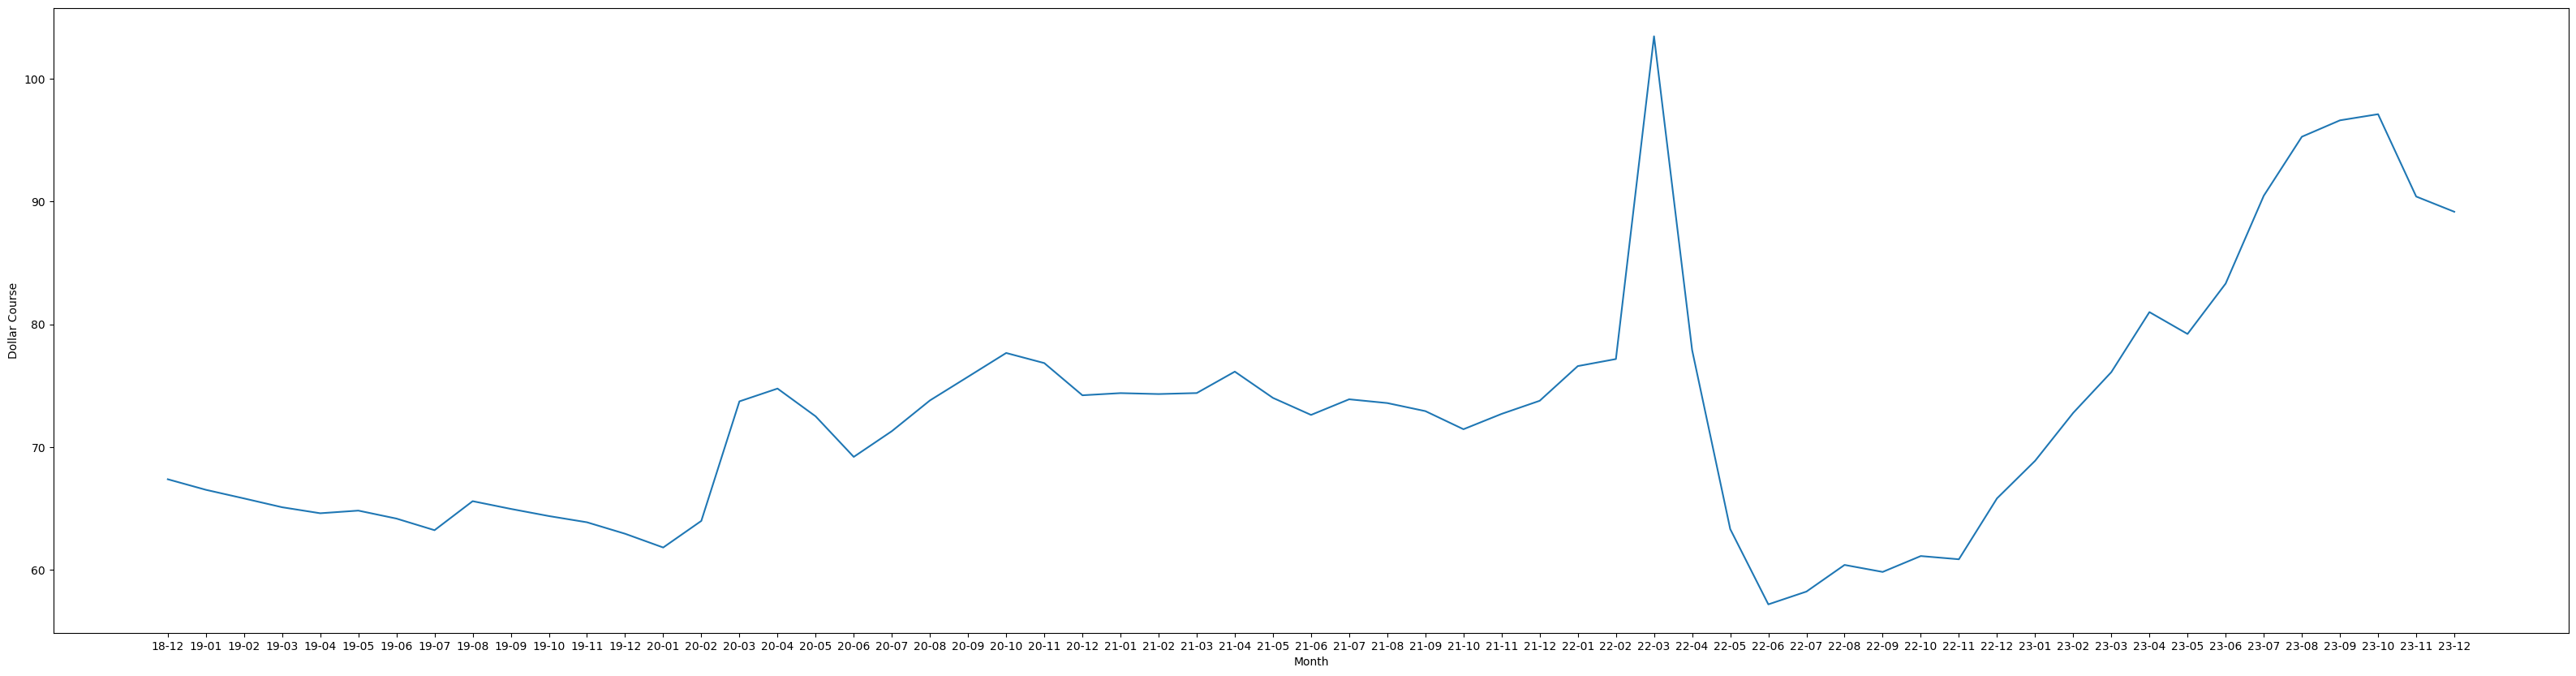

In [145]:
plt.figure(figsize=(40, 10))
plt.plot(df_curs['date'], df_curs['curs'])
plt.xlabel('Month')
plt.ylabel('Dollar Course')

In [135]:
df_inflation = pd.read_csv('russia.index.cpi (statbureau.org).csv')

In [136]:
df_inflation.head()

,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,1991,106.20,104.80,106.30,163.50,103.00,101.20,100.60,100.50,101.10,103.50,108.90,112.10
1,1992,345.30,138.00,129.90,121.70,111.90,119.10,110.60,108.60,111.50,122.90,126.10,125.20
2,1993,125.80,124.70,120.10,118.70,118.10,119.90,122.39,126.00,123.00,119.50,116.39,112.50
3,1994,117.90,110.82,107.41,108.49,106.91,106.00,105.33,104.62,107.96,115.00,114.61,116.44
4,1995,117.77,111.02,108.94,108.47,107.93,106.66,105.38,104.56,104.46,104.72,104.56,103.20


In [137]:
df_inflation = df_inflation[df_inflation['Год'] > 2017]

In [139]:
df_inflation.head(6)

,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
27,2018,100.31,100.21,100.29,100.38,100.38,100.49,100.27,100.01,100.16,100.35,100.50,100.84
28,2019,101.01,100.44,100.32,100.29,100.34,100.04,100.20,99.76,99.84,100.13,100.28,100.36
29,2020,100.40,100.33,100.55,100.83,100.27,100.22,100.35,99.96,99.93,100.43,100.71,100.83
30,2021,100.67,100.78,100.66,100.58,100.74,100.69,100.31,100.17,100.60,101.11,100.96,100.82
31,2022,100.99,101.17,107.61,101.56,100.12,99.65,99.61,99.48,100.05,100.18,100.37,100.78
32,2023,100.84,100.46,100.37,100.38,100.31,100.37,100.63,100.28,100.87,100.83,NaN,NaN


In [140]:
df_inflation_by_month = pd.DataFrame({'date': ['18-12', '19-01', '19-02', '19-03', '19-04', '19-05', '19-06',
                             '19-07', '19-08', '19-09', '19-10', '19-11', '19-12', '20-01', 
                             '20-02', '20-03', '20-04', '20-05', '20-06', '20-07', '20-08', 
                             '20-09', '20-10', '20-11', '20-12', '21-01', '21-02', '21-03', 
                             '21-04', '21-05', '21-06', '21-07', '21-08', '21-09', '21-10',
                             '21-11', '21-12', '22-01', '22-02', '22-03', '22-04', '22-05', 
                             '22-06', '22-07', '22-08', '22-09', '22-10', '22-11', '22-12',
                             '23-01', '23-02', '23-03', '23-04', '23-05', '23-06', '23-07',
                             '23-08', '23-09', '23-10',],
                    'Index': [100.84, 101.01, 100.44, 100.32, 100.29, 100.34, 100.04, 100.20,
                          99.76, 99.84, 100.13, 100.28, 100.36, 100.40, 100.33, 100.55, 
                          100.83, 100.27, 100.22, 100.35, 99.96, 99.93, 100.43, 100.71,
                          100.83, 100.67, 100.78, 100.66, 100.58, 100.74, 100.69, 100.31,
                          100.17, 100.60, 101.11, 100.96, 100.82, 100.99, 101.17, 107.61,
                          101.56, 100.12, 99.65, 99.61, 99.48, 100.05, 100.18, 100.37,
                          100.78, 100.84, 100.46, 100.37, 100.38, 100.31, 100.37, 100.63,
                          100.28, 100.87, 100.83]})

### График изменения уровня инфляции за последние 5 лет

Text(0, 0.5, 'Dollar Course')

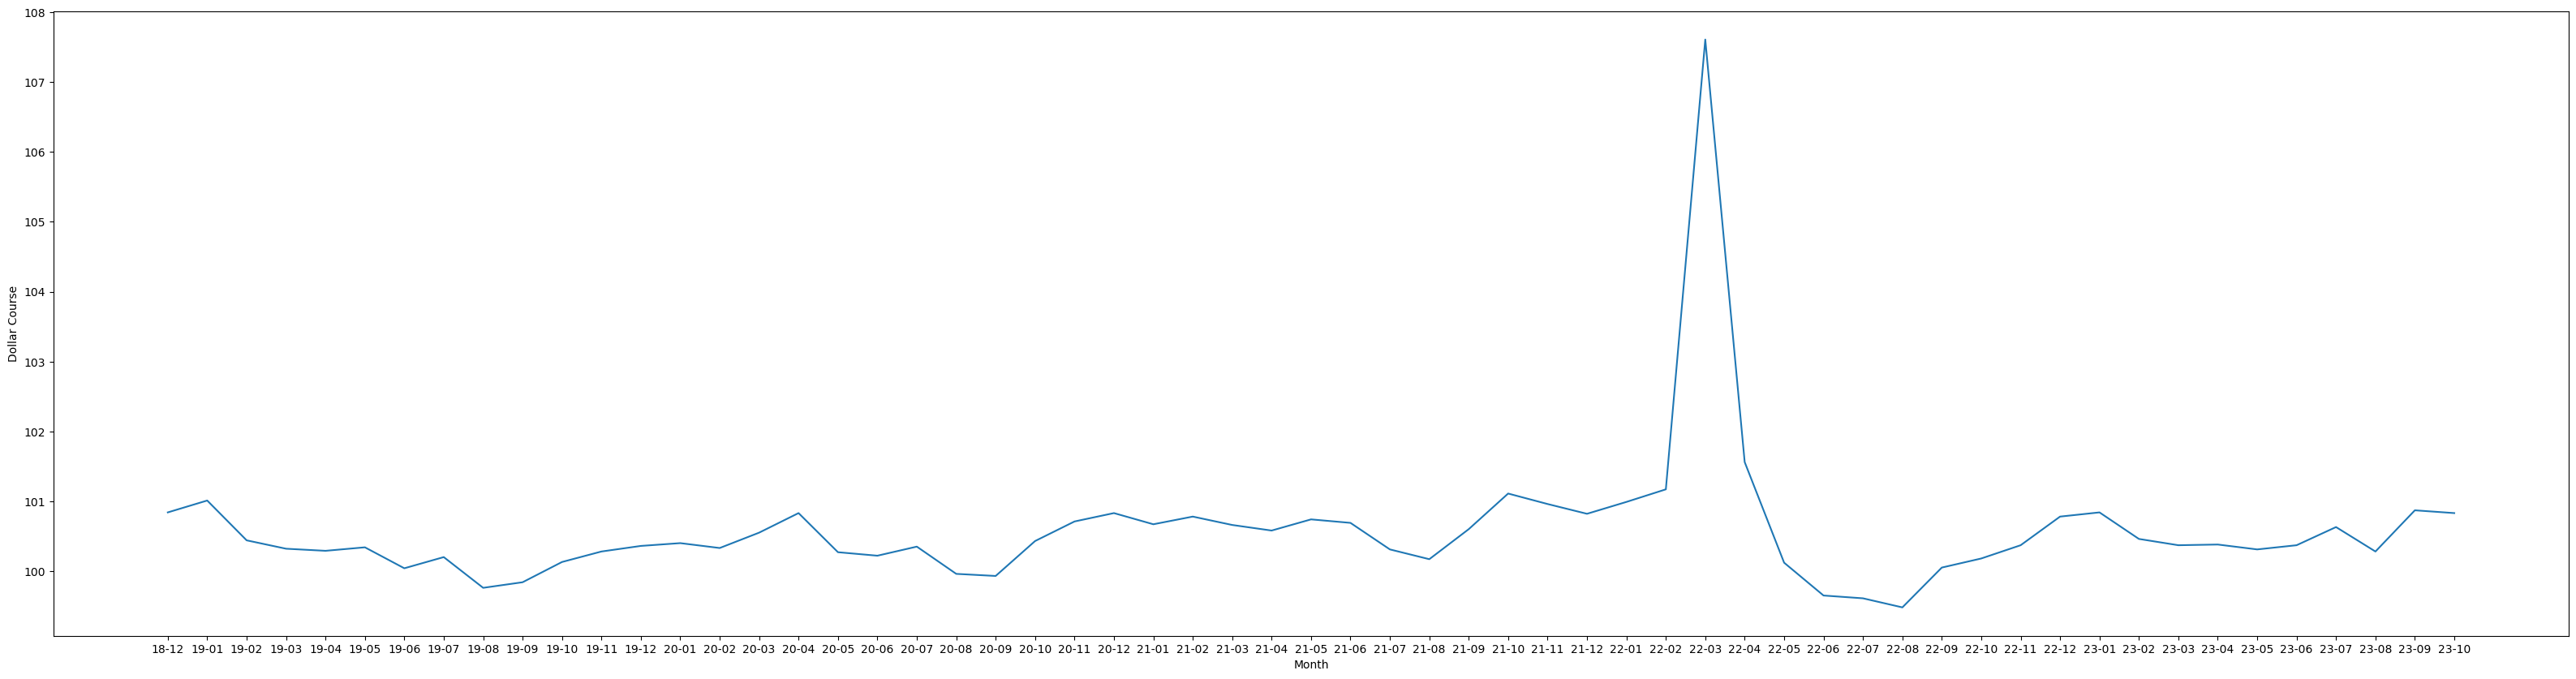

In [150]:
plt.figure(figsize=(40, 10))
plt.plot(df_inflation_by_month['date'], df_inflation_by_month['Index'])
plt.xlabel('Month')
plt.ylabel('Dollar Course')

In [162]:
correlation, pvalue = df_correlation['curs'].corr(df_correlation['Index'], method='pearson')

TypeError: cannot unpack non-iterable numpy.float64 object

### Анализ взаимосвязи уровня инфляции и курса доллара за последние 5 лет

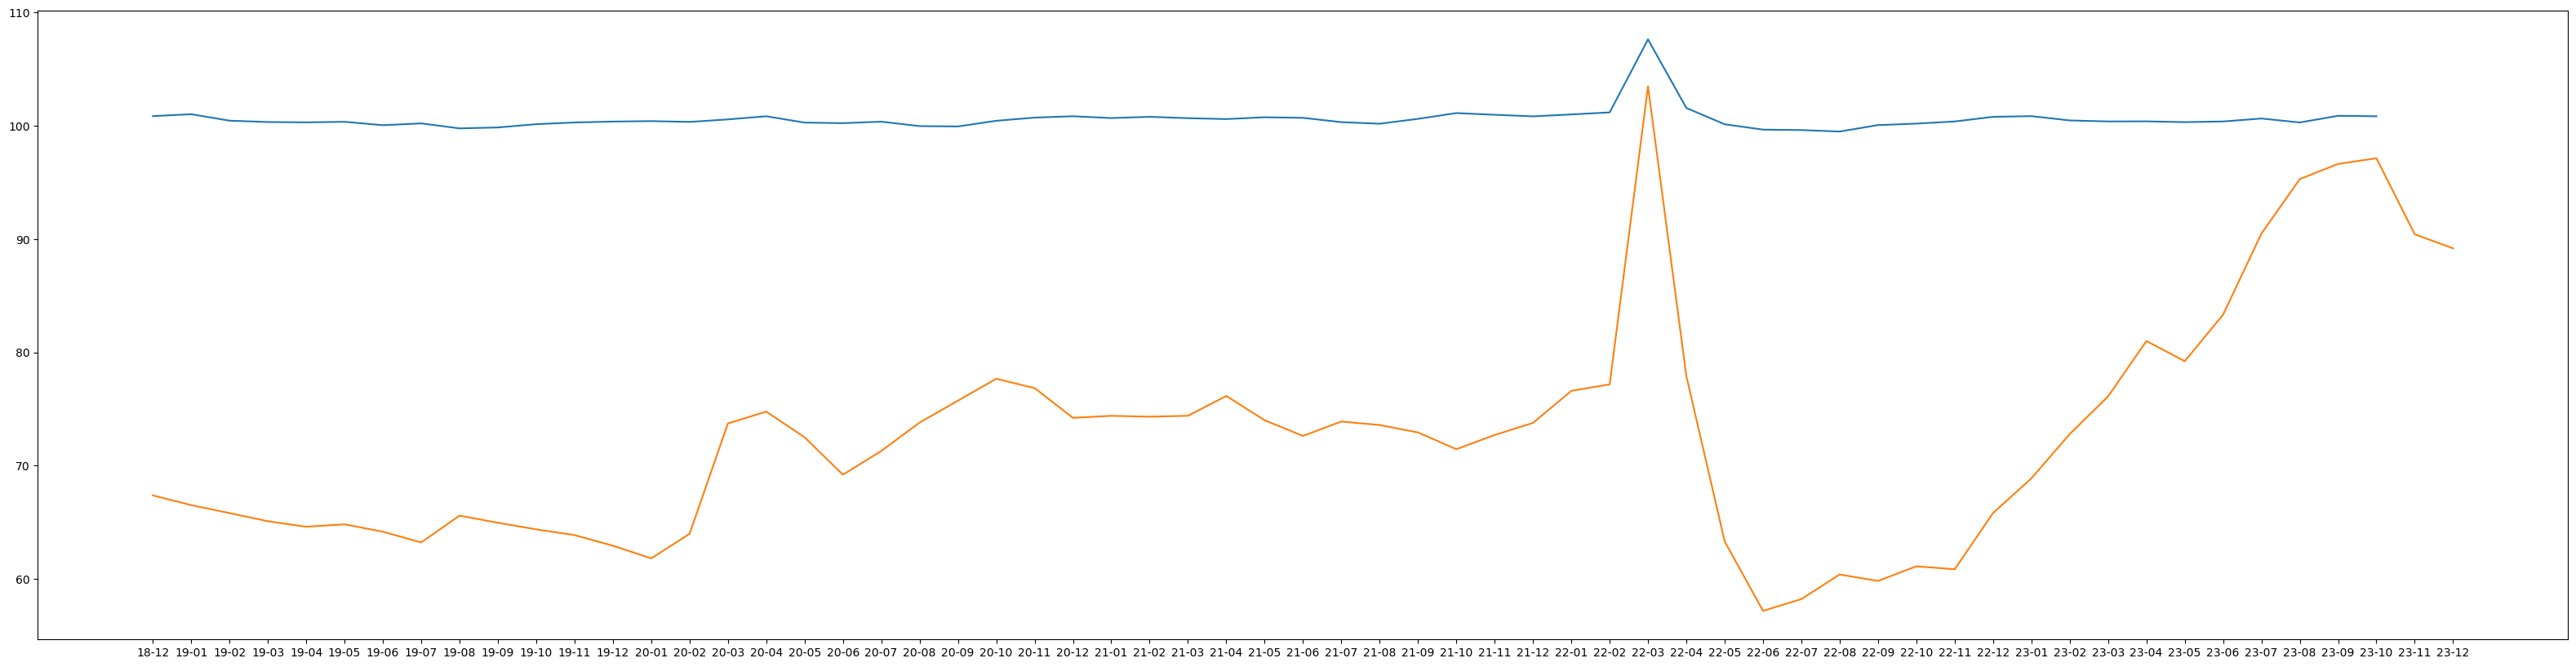

In [151]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.plot(df_inflation_by_month['date'], df_inflation_by_month['Index'], label='Уровень инфляции')
ax.plot(df_curs['date'], df_curs['curs'], label='Курс доллара')

In [ ]:
df_correlation = pd.merge(df_inflation_by_month, df_curs, on='date')

In [164]:
df_correlation.corr()

/var/folders/kd/k_stk3p933z3y3mtzlhgf0x40000gn/T/ipykernel_35742/2216800395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation.corr()


,Index,curs
Index,1.000000,0.554991
curs,0.554991,1.000000
